# PyTorch Geometric

This code was implemented by following this guide: https://analyticsindiamag.com/hands-on-guide-to-pytorch-geometric-with-python-code/

In [50]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

# Data handling of Graphs

## Creating a graph manually

 Creating an unweighted and undirected graph with three nodes and four edges.

In [51]:
# import the libraries
import torch
from torch_geometric.data import Data
# making the edge
# the tensor defining the source and target nodes of all edges, is not a list of index tuples
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
# making nodes
# Node feature matrix with shape [num_nodes, num_node_features]
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)
data = Data(x=x, edge_index=edge_index)


Investigating the dataset

In [52]:
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset sample: \n", data.x)
for i in range(3):
    print("Node", i,": x1=", data.x[i])
print("Dataset edge_index: \n", data.edge_index)
print("Dataset edge_index transpost: \n", data.edge_index.T)
print("Dataset: ", data)

Dataset type:  <class 'torch_geometric.data.data.Data'>
Dataset features:  1
Dataset sample: 
 tensor([[-1.],
        [ 0.],
        [ 1.]])
Node 0 : x1= tensor([-1.])
Node 1 : x1= tensor([0.])
Node 2 : x1= tensor([1.])
Dataset edge_index: 
 tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])
Dataset edge_index transpost: 
 tensor([[0, 1],
        [1, 0],
        [1, 2],
        [2, 1]])
Dataset:  Data(x=[3, 1], edge_index=[2, 4])


### Visualization

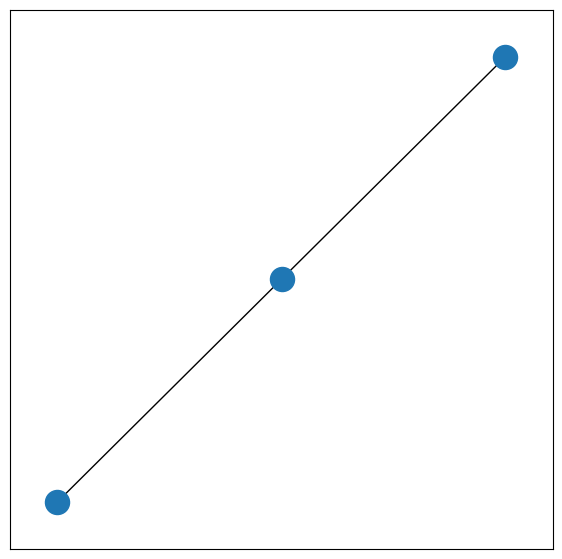

In [53]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

## Common Benchmark Datasets

### Import a dataset

Import enzymes dataset from TUdataset, a variety of graph kernel benchmark datasets e.g. “IMDB-BINARY”, “REDDIT-BINARY” or “PROTEINS”, collected from the TU Dortmund University, availables on https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.TUDataset

classTUDataset(root: str, name: str, transform: Optional[Callable] = None, pre_transform: Optional[Callable] = None, pre_filter: Optional[Callable] = None, use_node_attr: bool = False, use_edge_attr: bool = False, cleaned: bool = False)

In [54]:
from torch_geometric.datasets import TUDataset
data = TUDataset(root='datasets/', name='ENZYMES')

In [55]:
print("Dataset type: \t", type(data))
print("Dataset features: \t", data.num_features)
print("Dataset: \t", data)
print("First data in Dataset: \t", data[0])
print("Last data in Dataset: \t", data[-1])

Dataset type: 	 <class 'torch_geometric.datasets.tu_dataset.TUDataset'>
Dataset features: 	 3
Dataset: 	 ENZYMES(600)
First data in Dataset: 	 Data(edge_index=[2, 168], x=[37, 3], y=[1])
Last data in Dataset: 	 Data(edge_index=[2, 156], x=[48, 3], y=[1])


### Show edge index

In [56]:
print("Edge index size: \t", (data[0].edge_index).shape)
print("Edge index: \t", data[0].edge_index)

Edge index size: 	 torch.Size([2, 168])
Edge index: 	 tensor([[ 0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
          3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16,
         16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 20,
         21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25,
         25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28,
         28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 32,
         32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35,
         35, 35, 36, 36, 36, 36],
        [ 1,  2,  3,  0,  2,  3, 24, 27,  0,  1,  3, 27, 28,  0,  1,  2,  4,  5,
         28,  3,  5,  6, 29,  3,  4,  6,  7, 29,  4,  5,  7,  8,  5,  6,  8,  9,
         10,  6,  7, 

### Show x

In [57]:
print("x size: \t", (data[0].x).shape)
print("x: \t", data[0].x)

x size: 	 torch.Size([37, 3])
x: 	 tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])


### Show y

In [58]:
import numpy as np

print("Edge y size:\t", (data[0].y).shape)
print("Edge y: \t", data[0].y)
all_y = [(data[i].y)[0] for i in range(600)]
print("Classes:\t", np.unique(all_y))
print("No. of classes:\t", len(np.unique(all_y)))

Edge y size:	 torch.Size([1])
Edge y: 	 tensor([5])
Classes:	 [0 1 2 3 4 5]
No. of classes:	 6


### Visualization

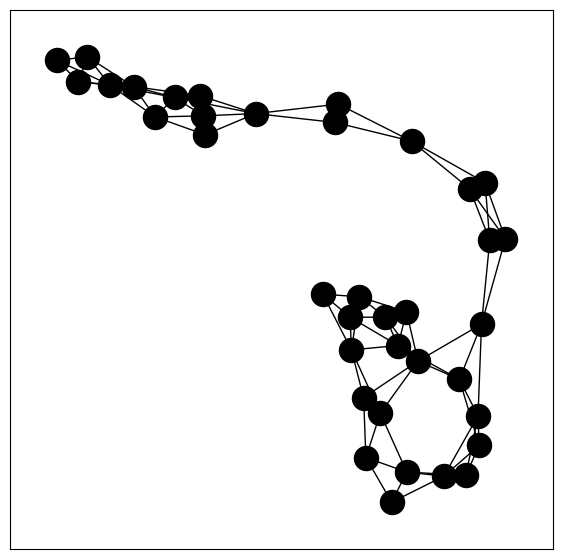

In [65]:
from torch_geometric.utils import to_networkx

G = to_networkx(data[0], to_undirected=True)
visualize_graph(G, "Black")

## Mini-Batches

In [ ]:
from torch_geometric.data import DataLoader
loader = DataLoader(data, batch_size=32, shuffle=True)
print(data[0])
for batch in loader:
    print(batch)
    print("No. of graphs in batch:\t",batch.num_graphs)
    break


Data(edge_index=[2, 168], x=[37, 3], y=[1])
DataBatch(edge_index=[2, 3514], x=[909, 3], y=[32], batch=[909], ptr=[33])
No. of graphs in batch:	 32


/Users/nopphawannurnuansuwan/opt/anaconda3/envs/gnn03/lib/python3.7/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
